In [1]:
#Sample signal
import os
import numpy as np
import pandas as pd
import sklearn
import scipy
import scipy.io.wavfile
from scipy.io import wavfile
from scipy.fftpack import dct
from matplotlib import pyplot as plt
import librosa
import librosa.display
import librosa.display as dsp
import IPython.display as ipd
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
speech_path= 'C:/Users/Selamu/ASR Model for Hadiyyisa Language/Speech/fold1/Speaker1_30.wav'

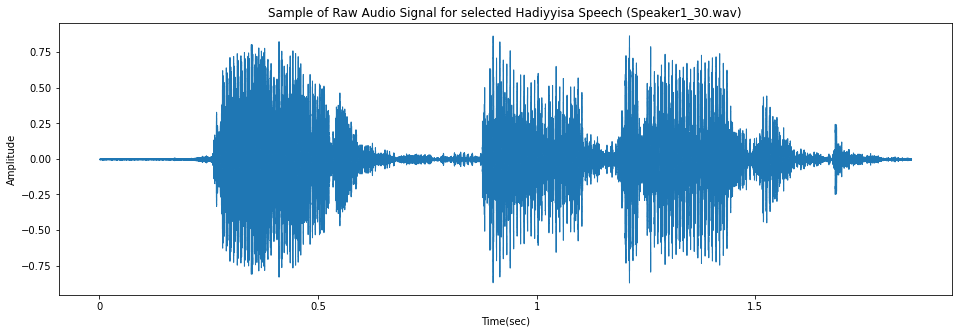

In [3]:
plt.figure(figsize=(16,5))
data,sample_rate=librosa.load(speech_path)
librosa.display.waveshow(data,sr=sample_rate)

plt.title("Sample of Raw Audio Signal for selected Hadiyyisa Speech (Speaker1_30.wav)")
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')

ipd.Audio(speech_path)

In [8]:
sample_rate

22050

In [9]:
##################  PLAYING THE AUDIO  #########################
signal, sample_rate = librosa.load('C:/Users/Selamu/ASR Model for Hadiyyisa Language/Speech/fold1/Speaker1_30.wav', mono=False,duration=80)
ipd.Audio(data=signal,rate=sample_rate)

In [10]:
data = pd.read_csv("C:/Users/Selamu/ASR Model for Hadiyyisa Language/Had_Speech_Transcription.csv", encoding='cp1252',header=None)
data.rename(columns={0:'text', 1:'char_length',2: 'speech',3:'duration',4:'fold',5:'classID',6:'Class'},inplace=True)
data

,text,char_length,speech,duration,fold,classID,Class
0,Eraarem tiironne shoomamaakko. ...,31,Speaker1_1.wav,2.429,1,0,Selamu
1,Hadiyyi heechqaanqanne kurimma.,32,Speaker1_2.wav,2.143,1,0,Selamu
2,Lamaqqi sagalluwwa kitaabimma.,30,Speaker1_3.wav,2.246,1,0,Selamu
3,Landi losaano gafaassimma.,25,Speaker1_4.wav,3.291,1,0,Selamu
4,Anganne amaddam daato'o.,23,Speaker1_5.wav,2.613,1,0,Selamu
...,...,...,...,...,...,...,...
3995,hagayyinna hurbaata wiximinna abuullakka’a gu...,42,Speaker50_3996.wav,2.804,50,49,Degele
3996,wix hurbaati woronne haraf li’ulaseensi shuqun...,36,Speaker50_3997.wav,2.688,50,49,Degele
3997,fiittenne hurbaat fiitaa hamaamaa mishookko.,34,Speaker50_3998.wav,2.807,50,49,Degele
3998,odim hurbaat gogoohaare murakka’a wixxaa’aakka...,37,Speaker50_3999.wav,1.377,50,49,Degele


In [12]:
labels= {"fold1", "fold2", "fold3", "fold4", "fold5", "fold6", "fold7", "fold8", "fold9", "fold10", "fold11", "fold12",
         "fold13", "fold14", "fold15", "fold16", "fold17", "fold18", "fold19", "fold20", "fold21" ,"fold22", "fold23", 
         "fold24", "fold25", "fold26", "fold27", "fold29", "fold29", "fold30", "fold31", "fold32", "fold33", "fold34", 
         "fold35", "fold36", "fold37", "fold38", "fold39", "fold40", "fold41", "fold42", "fold43", "fold44", "fold44", 
         "fold45", "fold46", "fold46", "fold47", "fold48", "fold49", "fold50",}

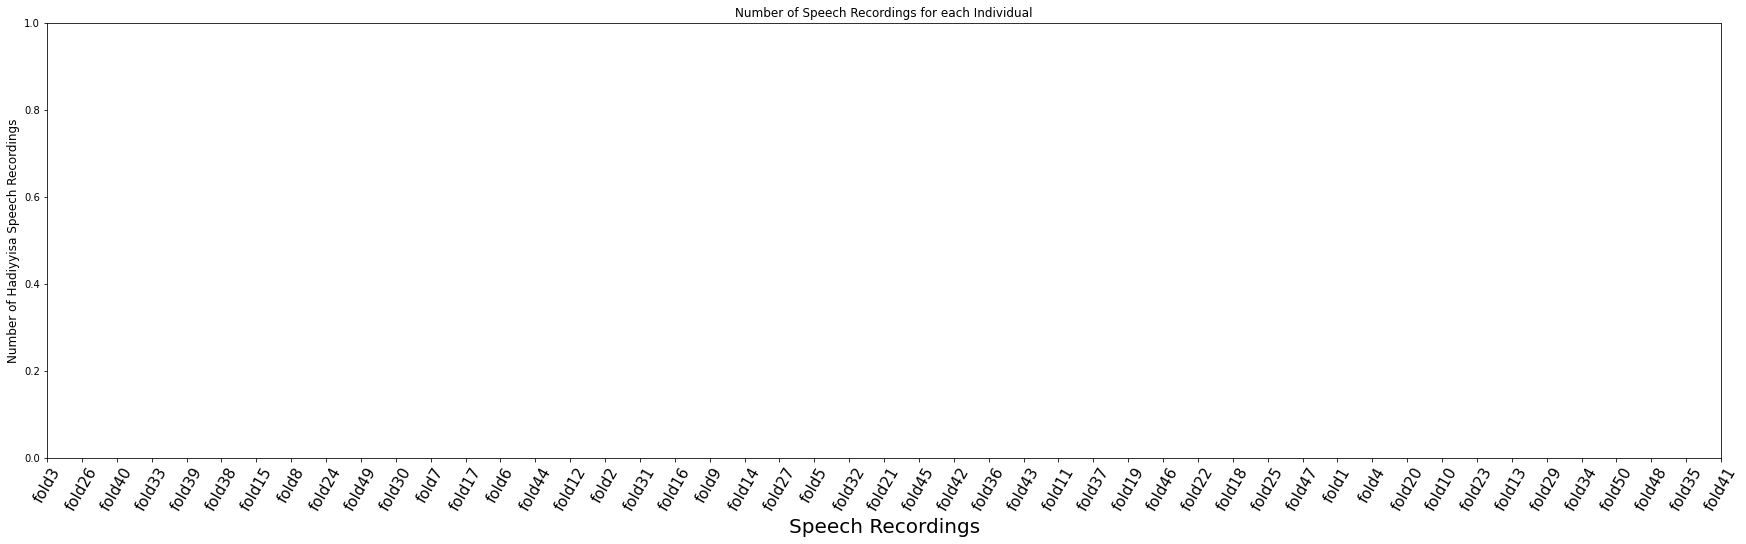

In [16]:
#plot
plt.figure(figsize=(30,8))
index = np.arange(len(labels))
#plt.bar(index, no_of_recordings)
plt.xlabel('Speech Recordings', fontsize=20)
plt.ylabel('Number of Hadiyyisa Speech Recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('Number of Speech Recordings for each Individual')
plt.show()

In [17]:
sample_rate, audio = wavfile.read('C:/Users/Selamu/ASR Model for Hadiyyisa Language/Speech/fold1/Speaker1_30.wav')
print('Number of the samples for selected Hadiyyisa sentence speech: '+str(len(signal)))
print("Sample_rate for selected Hadiyyisa sentence speech: {0}Hz".format(sample_rate))
print("Audio duration for selected Hadiyyisa sentence speech: {0}s".format(len(audio)/sample_rate))

Number of the samples for selected Hadiyyisa sentence speech: 40935
Sample_rate for selected Hadiyyisa sentence speech: 16000Hz
Audio duration for selected Hadiyyisa sentence speech: 1.8564375s


C:\Users\Selamu\AppData\Local\Temp/ipykernel_3416/4136705386.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio = wavfile.read('C:/Users/Selamu/ASR Model for Hadiyyisa Language/Speech/fold1/Speaker1_30.wav')


Text(0.5, 24.0, 'Time(sec)')

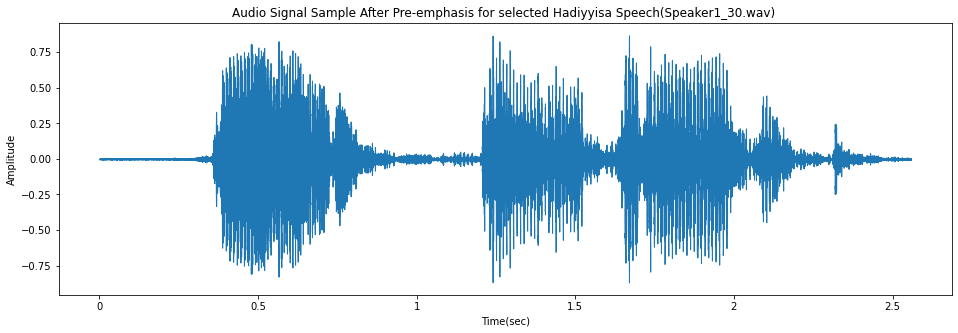

In [18]:
#####################   PRE-EMPHASIZING AND PLOTING THE SIGNAL   #####################3
pre_emphasis = 0.97
emphasized_signal=np.append(signal[0],signal[1:]-pre_emphasis*signal[:-1])
#Plot the signal:
plt.figure(figsize=(16, 5))
librosa.display.waveshow(signal, sr=sample_rate)
plt.title("Audio Signal Sample After Pre-emphasis for selected Hadiyyisa Speech(Speaker1_30.wav) ")
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')

In [19]:
###############    NORMALIZING AUDIO SIGNAL FOR SELECTED SPEECH  ################
def normalize_audio(signal):
    signal = signal / np.max(np.abs(signal))
    return signal

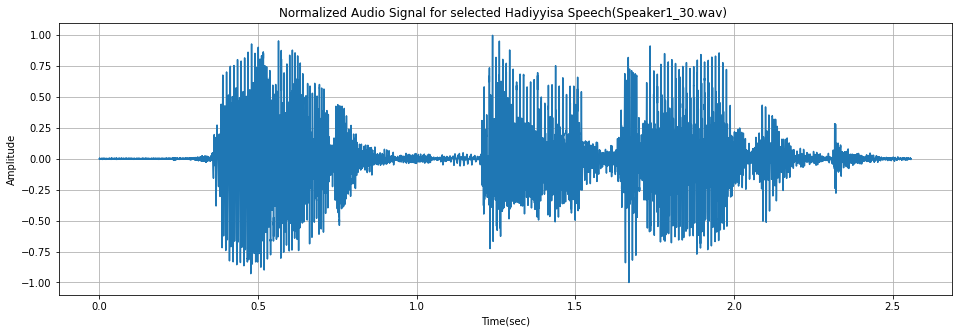

In [20]:
signal = normalize_audio(signal)
plt.figure(figsize=(16,5))
plt.plot(np.linspace(0, len(signal) / sample_rate, num=len(signal)), signal)
plt.title("Normalized Audio Signal for selected Hadiyyisa Speech(Speaker1_30.wav) ")
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.grid(True)

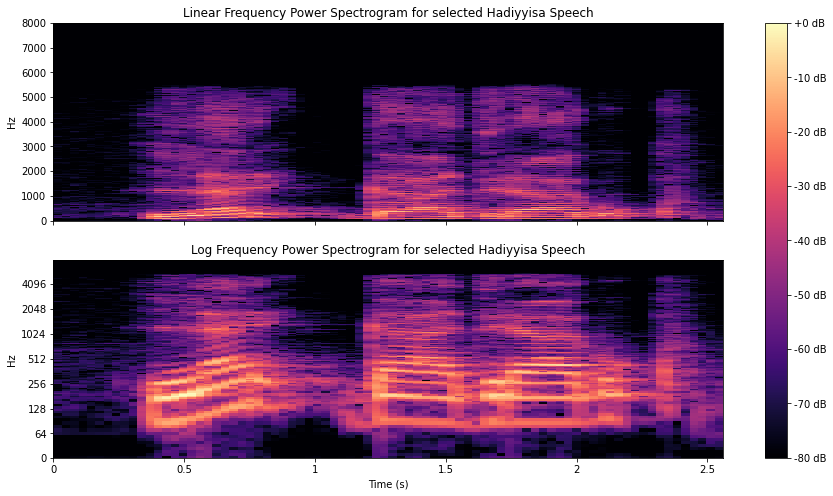

In [21]:
##################   SPECTROGRAM:   ####################
d = librosa.stft(signal)
D = librosa.amplitude_to_db(np.abs(d),ref=np.max)
fig,ax = plt.subplots(2,1,sharex=True,figsize=(15,8))
img = dsp.specshow(D, y_axis='linear', x_axis='s',sr=sample_rate,ax=ax[0])
ax[0].set(title='Linear Frequency Power Spectrogram for selected Hadiyyisa Speech')
ax[0].label_outer()
dsp.specshow(D,y_axis='log',x_axis='s',sr=sample_rate,ax=ax[1])
ax[1].set(title='Log Frequency Power Spectrogram for selected Hadiyyisa Speech')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format='%+2.f dB')

<Figure size 1152x360 with 0 Axes>

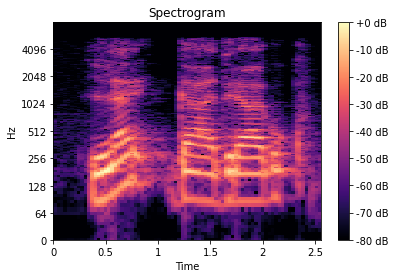

<Figure size 1152x360 with 0 Axes>

In [22]:
spec = np.abs(librosa.stft(signal, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.figure(figsize=(16,5))

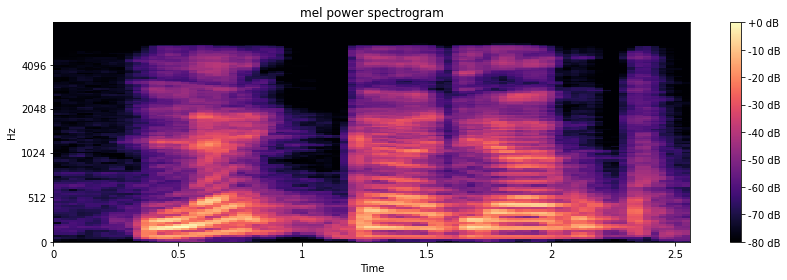

In [23]:

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(signal, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [24]:
################   FRAMING BLOCKING OF THE SPEECH FRAMES   ###################33
frame_size = 0.025
frame_stride = 0.01
frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  
# Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = np.zeros((pad_signal_length - signal_length))
pad_signal = np.append(emphasized_signal, z) 
# Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the 
# original signal

indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step),
                                                                         (frame_length, 1)).T
frames = pad_signal[indices.astype(np.int32, copy=False)]

In [25]:
################ Audio Framing  ######################
def frame_audio(audio, FFT_size=2048, hop_size=10, sample_rate=16000):
    # hop_size in ms
    
    audio = np.pad(audio, int(FFT_size / 2), mode='reflect')
    frame_len = np.round(sample_rate * hop_size / 1000).astype(int)
    frame_num = int((len(audio) - FFT_size) / frame_len) + 1
    frames = np.zeros((frame_num,FFT_size))
    
    for n in range(frame_num):
        frames[n] = audio[n*frame_len:n*frame_len+FFT_size]
    
    return frames

In [26]:
frames

array([[-3.69134359e-04,  7.12218578e-04, -5.42327762e-04, ...,
         1.13292621e-03, -1.64068188e-04, -4.74734057e-04],
       [-5.33160055e-04,  7.84929842e-04,  7.12180277e-04, ...,
        -1.95941422e-04,  3.19262908e-04, -1.25957944e-04],
       [ 1.09182321e-04,  1.15067349e-04, -8.30198755e-04, ...,
         2.47686170e-04,  5.93954057e-04,  2.53112521e-05],
       ...,
       [ 1.75578694e-04, -7.73358974e-04, -1.99971066e-04, ...,
         1.18484604e-03,  3.51523049e-04,  9.98843461e-05],
       [ 1.06955809e-03,  9.84856859e-04,  2.74248421e-04, ...,
         5.63407317e-04, -2.55227555e-04, -1.75585039e-04],
       [ 7.81267881e-05, -4.09754459e-04,  3.63466796e-04, ...,
         1.62882498e-05, -6.72478112e-04, -7.33044464e-04]])

In [27]:
hop_size = 20 #ms
FFT_size = 2048

audio_framed = frame_audio(audio, FFT_size=FFT_size, hop_size=hop_size, sample_rate=sample_rate)
print("Framed Audio Shape for selected Hadiyyisa Speech: {0}".format(audio_framed.shape))

Framed Audio Shape for selected Hadiyyisa Speech: (93, 2048)


In [28]:
print("First Frame for selected Hadiyyisa Speech(Speaker1_30.wav):")
audio_framed[1]

First Frame for selected Hadiyyisa Speech(Speaker1_30.wav):


array([-11.,   7.,  16., ..., -23., -12., -85.])

In [29]:
print("Last Frame for selected Hadiyyisa Speech:")
audio_framed[-1]

Last Frame for selected Hadiyyisa Speech:


array([   5.,  -17., -111., ...,  188.,  190.,  164.])

In [30]:
##############33 HAMMING  WINDOWING  ##################333
frames *= np.hamming(frame_length)
# frames *= 0.54 - 0.46 * numpy.cos((2 * numpy.pi * n) / (frame_length - 1))  # Explicit Implementation **
#window = get_window("hann", FFT_size, fftbins=True)

In [31]:
####################### FOURIER-TRANSFORM AND POWER SPECTRUM  ###########################
nfft = 2048
magnitude_frames = np.absolute(np.fft.rfft(frames, nfft))  # Magnitude of the FFT
power_frames = np.abs(np.fft.fft(magnitude_frames))**2  # Power Spectrum

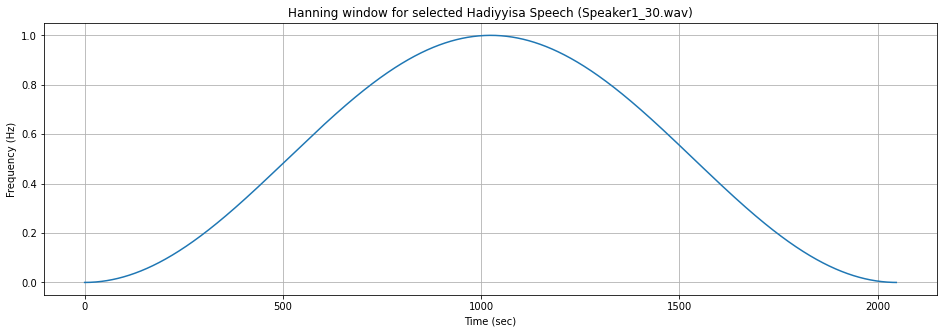

In [32]:
################### CONVERT TO FREQUENCY DOMAIN  #########################
window = get_window("hann", FFT_size, fftbins=True)
plt.figure(figsize=(16,5))
plt.plot(window)
plt.title("Hanning window for selected Hadiyyisa Speech (Speaker1_30.wav)")
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.grid(True)

In [33]:
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

In [34]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [35]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

Text(0.5, 0, 'Time in Seconds')

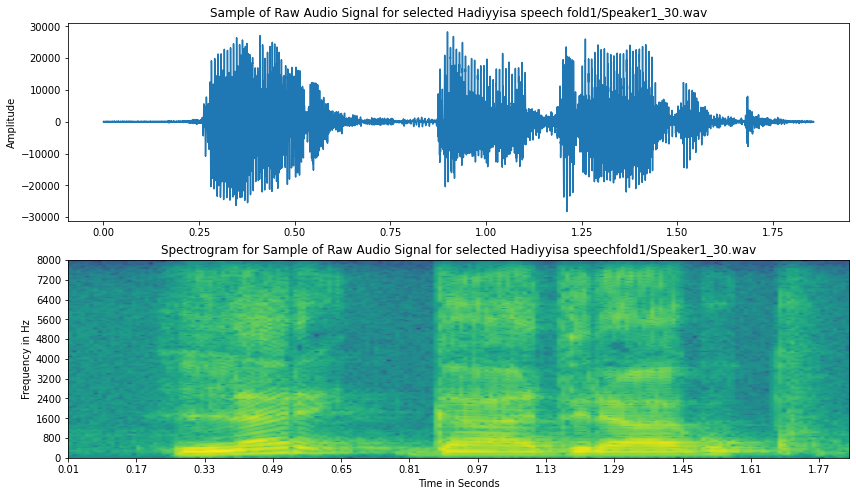

In [36]:
speech_path = 'C:/Users/Selamu/ASR Model for Hadiyyisa Language/Speech/'
filename = 'fold1/Speaker1_30.wav'
sample_rate, samples = wavfile.read(str(speech_path) + filename)

freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Sample of Raw Audio Signal for selected Hadiyyisa speech ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, len(samples)/sample_rate, len(samples)), samples)


ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram for Sample of Raw Audio Signal for selected Hadiyyisa speech' + filename)
ax2.set_ylabel('Frequency in Hz')
ax2.set_xlabel('Time in Seconds')

In [37]:
y, sample_rate = librosa.load('C:/Users/Selamu/ASR Model for Hadiyyisa Language/Speech/fold1/Speaker1_30.wav', mono=False,duration=80)
ipd.Audio(data=y,rate=sample_rate)

In [38]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

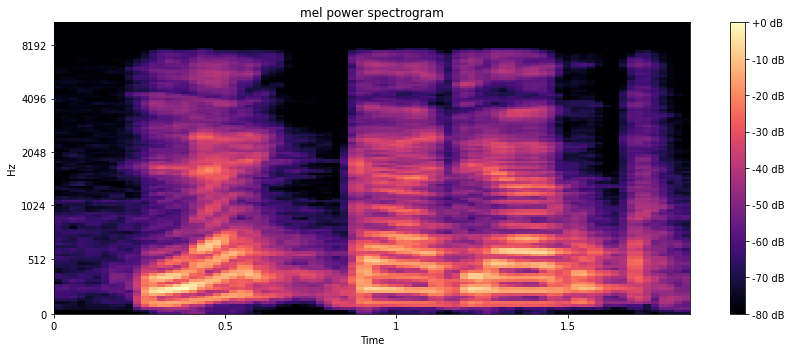

In [39]:

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,5))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

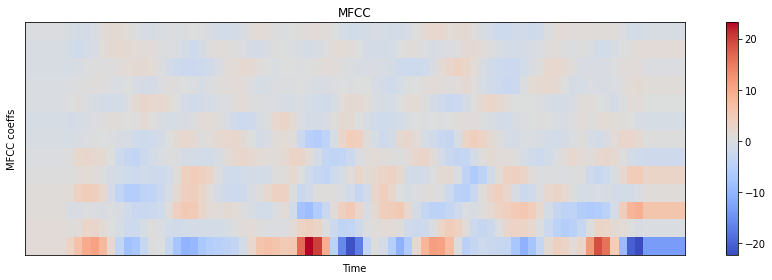

In [40]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [41]:
ipd.Audio(samples, rate=sample_rate)
samples_cut = samples[4000:13000]
ipd.Audio(samples_cut, rate=sample_rate)

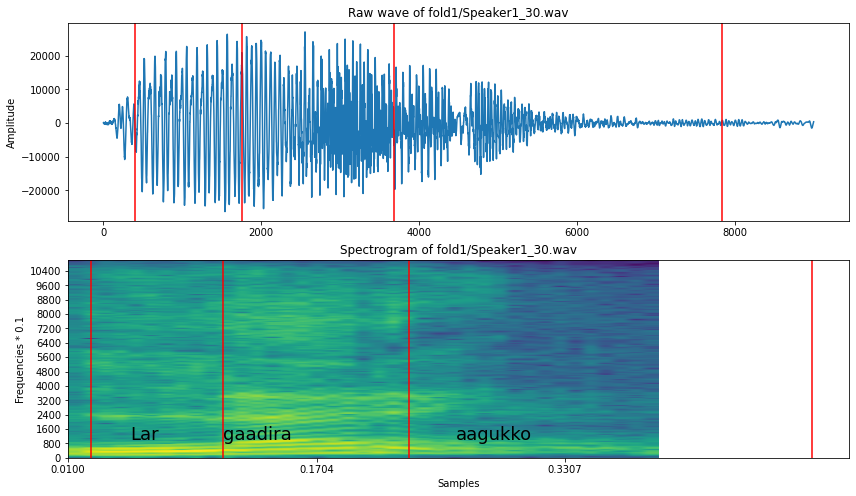

In [42]:
speech_path = 'C:/Users/Selamu/ASR Model for Hadiyyisa Language/Speech/'
filename = 'fold1/Speaker1_30.wav'

# freqs, times, spectrogram = log_specgram(samples, sample_rate)
freqs, times, spectrogram_cut = log_specgram(samples_cut, sample_rate)


fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(samples_cut)

ax2 = fig.add_subplot(212)
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Frequencies * 0.1')
ax2.set_xlabel('Samples')
ax2.imshow(spectrogram_cut.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.text(0.05, 1000, 'Lar', fontsize=18)
ax2.text(0.11, 1000, 'gaadira', fontsize=18)
ax2.text(0.26, 1000, 'aagukko', fontsize=18)

xcoords = [0.025, 0.11, 0.23, 0.49]
for xc in xcoords:
    ax1.axvline(x=xc*16000, c='r')
    ax2.axvline(x=xc, c='r')

In [43]:
def custom_fft(signal, fs):
    T = 1.0 / fs
    N = signal.shape[0]
    yf = fft(signal)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    vals = 2.0/N * np.abs(yf[0:N//2])  # FFT is simmetrical, so we take just the first half
    # FFT is also complex, to we take just the real part (abs)
    return xf, vals

In [44]:
speech_path= 'C:/Users/Selamu/ASR Model for Hadiyyisa Language/Speech/fold1/Speaker1_30.wav'
new_sample_rate = 8000

sample_rate, samples = wavfile.read(speech_path)
resampled = signal.resample(samples, int(new_sample_rate/sample_rate * samples.shape[0]))

In [45]:
ipd.Audio(samples, rate=sample_rate)

In [46]:
ipd.Audio(resampled, rate=new_sample_rate)

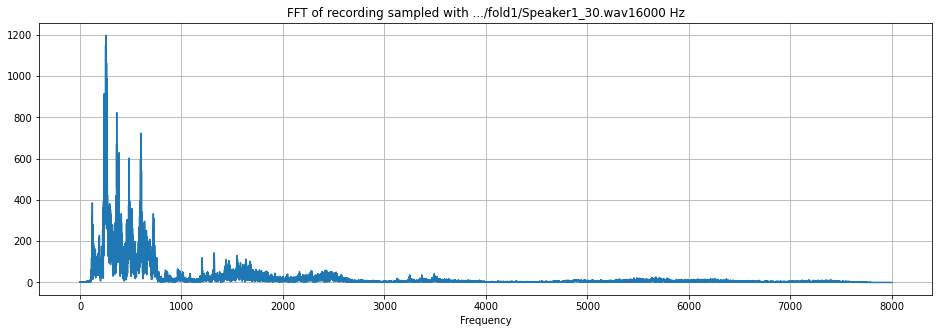

In [47]:
xf, vals = custom_fft(samples, sample_rate)
plt.figure(figsize=(16, 5))
plt.title('FFT of recording sampled with .../fold1/Speaker1_30.wav'  +  str(sample_rate) + ' Hz')
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()

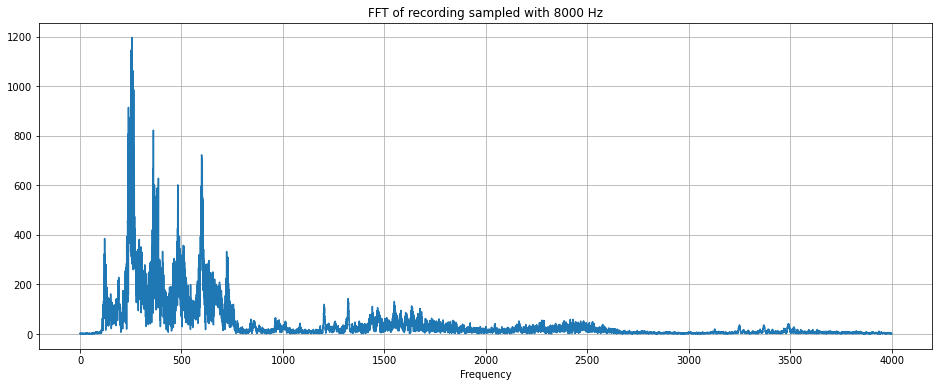

In [48]:
xf, vals = custom_fft(resampled, new_sample_rate)
plt.figure(figsize=(16, 6))
plt.title('FFT of recording sampled with ' + str(new_sample_rate) + ' Hz')
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()

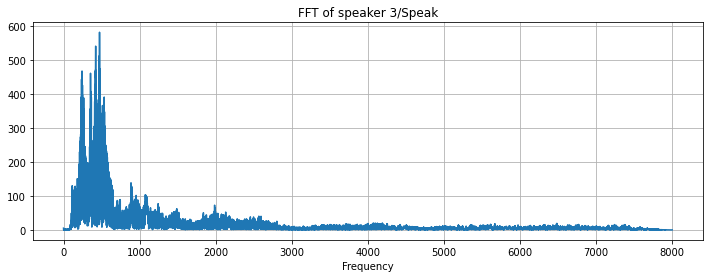

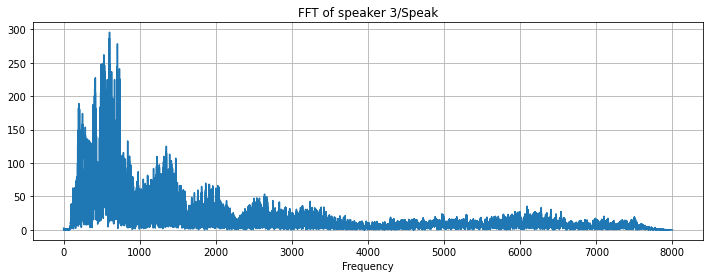

In [49]:
speech_path = 'C:/Users/Selamu/ASR Model for Hadiyyisa Language/Speech/'
filenames = ['fold3/Speaker3_210.wav', 'fold3/Speaker3_240.wav']
for filename in filenames:
    sample_rate, samples = wavfile.read(str(speech_path) + filename)
    xf, vals = custom_fft(samples, sample_rate)
    plt.figure(figsize=(12, 4))
    plt.title('FFT of speaker ' + filename[4:11])
    plt.plot(xf, vals)
    plt.xlabel('Frequency')
    plt.grid()
    plt.show()

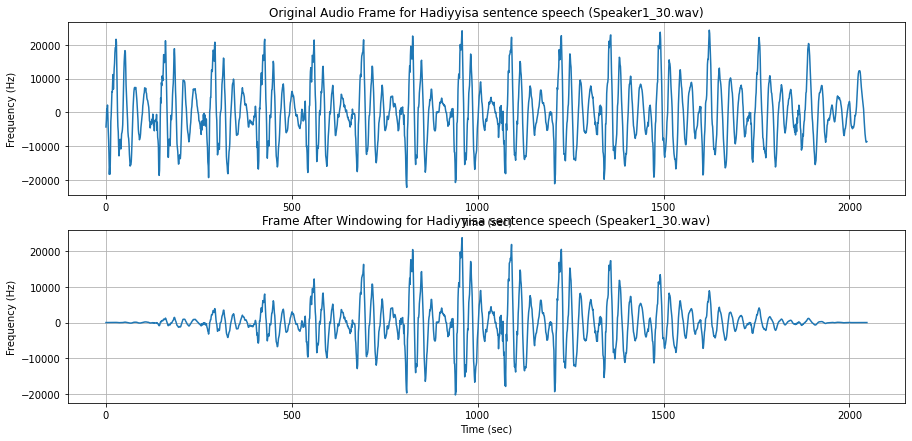

In [50]:
###########################  SPEECH FRAME BEFORE AND AFTRE FOR SELECTED HADIIYISA SENTENCE SPEECH ####################
audio_win = audio_framed * window

ind = 69
plt.figure(figsize=(15,7))
plt.subplot(2, 1, 1)
plt.plot(audio_framed[ind])
plt.title('Original Audio Frame for Hadiyyisa sentence speech (Speaker1_30.wav)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(audio_win[ind])
plt.title('\n\n\nFrame After Windowing for Hadiyyisa sentence speech (Speaker1_30.wav)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.grid(True)

In [51]:
import scipy.fftpack as fft
audio_winT = np.transpose(audio_win)

audio_fft = np.empty((int(1 + FFT_size / 2), audio_winT.shape[1]), dtype=np.complex64, order='F')

for n in range(audio_fft.shape[1]):
    audio_fft[:, n] = fft.fft(audio_winT[:, n], axis=0)[:audio_fft.shape[0]]

audio_fft = np.transpose(audio_fft)

In [52]:
################# CALCULATE SPEECH SIGNAL POWER FOR SELECTED HADIYYISA LANGUAGE   ############################# 
audio_power = np.square(np.abs(audio_fft))
print("Speech signal power shape for selected Hadiyyisa Speech: {0}".format(audio_power.shape))

Speech signal power shape for selected Hadiyyisa Speech: (93, 1025)


In [53]:
###################  MEL-SPACED FILTER BANK MAXIMIUM & MINIMIUM FREQUENCY #########################33
freq_min = 0
freq_high = sample_rate /2
mel_filter_num = 10

print("Minimum Frequency for selected Hadiyyisa sentence speech(Speaker1_30.wav): {0}".format(freq_min))
print("MaximIum frequency for selected Hadiyyisa sentence speech(Speaker1_30.wav): {0}".format(freq_high))

Minimum Frequency for selected Hadiyyisa sentence speech(Speaker1_30.wav): 0
MaximIum frequency for selected Hadiyyisa sentence speech(Speaker1_30.wav): 8000.0


In [54]:
########################### FILTER BANKS OF THE SPEECH  ##################################
nfilt = 40
low_freq_mel = 0
high_freq_mel = (2595 * np.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = np.floor((nfft + 1) * hz_points / sample_rate)

fbank = np.zeros((nfilt, int(np.floor(nfft / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = np.dot(power_frames, fbank.T)
filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * np.log10(filter_banks)  # dB

In [55]:
filter_banks

array([[ 15.54447609,   8.3740702 ,  -1.70673863, ..., -32.44555432,
         -8.3139932 ,  14.48090331],
       [ 11.91398872,  -4.37258146,  -3.15857541, ..., -34.99357053,
         -9.71030494,  14.00965791],
       [ 12.61387749,  -0.63921479,  -2.83719154, ..., -34.95018653,
         -5.91199669,  11.14763906],
       ...,
       [ 14.2434435 ,   5.91379266,   5.38156897, ..., -29.12338419,
         -4.7382047 ,  12.73298032],
       [ 15.75107609,   8.51579122,   5.55438441, ..., -33.32230178,
        -10.88386396,  13.54421669],
       [ 12.98792063,   7.74444758,   4.71699233, ..., -34.01747838,
         -9.88365107,  11.91629376]])

In [56]:
############################# Compute filter points ###########################
def freq_to_mel(freq):
    return 2595.0 * np.log10(1.0 + freq / 700.0)

def mel_to_freq(mels):
    return 700.0 * (10.0**(mels / 2595.0) - 1.0)

In [57]:
# Construct the filterbank
def get_filter_points(fmin, fmax, mel_filter_num, FFT_size, sample_rate=16000):
    fmin_mel = freq_to_mel(fmin)
    fmax_mel = freq_to_mel(fmax)
    
    print("MEL min for selected Hadiyyisa sentence speech: {0}".format(fmin_mel))
    print("MEL max for selected Hadiyyisa sentence speech: {0}".format(fmax_mel))
    
    mels = np.linspace(fmin_mel, fmax_mel, num=mel_filter_num+2)
    freqs = mel_to_freq(mels)
    
    return np.floor((FFT_size + 1) / sample_rate * freqs).astype(int), freqs

In [58]:
filter_points, mel_freqs = get_filter_points(freq_min, freq_high, mel_filter_num, FFT_size, sample_rate=16000)
filter_points

MEL min for selected Hadiyyisa sentence speech: 0.0
MEL max for selected Hadiyyisa sentence speech: 2840.023046708319


array([   0,   23,   52,   88,  134,  192,  264,  355,  470,  614,  796,
       1024])

In [59]:
# Construct the filterbank After we have the filter points, we construct the filters.
def get_filters(filter_points, FFT_size):
    filters = np.zeros((len(filter_points)-2,int(FFT_size/2+1)))
    
    for n in range(len(filter_points)-2):
        filters[n, filter_points[n] : filter_points[n + 1]] = np.linspace(0, 1, filter_points[n + 1] - filter_points[n])
        filters[n, filter_points[n + 1] : filter_points[n + 2]] = np.linspace(1, 0, filter_points[n + 2] - filter_points[n + 1])
    
    return filters

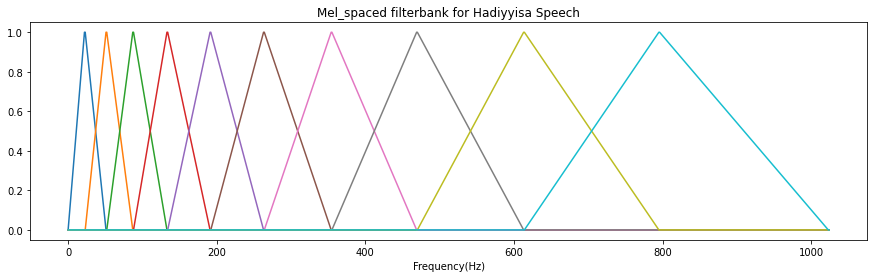

In [60]:
filters = get_filters(filter_points, FFT_size)

plt.figure(figsize=(15,4))
for n in range(filters.shape[0]):
    plt.plot(filters[n])
    plt.title('Mel_spaced filterbank for Hadiyyisa Speech')
    #plt.ylabel('Amplitude')
    plt.xlabel('Frequency(Hz)')

In [61]:
# taken from the librosa library
enorm = 2.0 / (mel_freqs[2:mel_filter_num+2] - mel_freqs[:mel_filter_num])
filters *= enorm[:, np.newaxis]

In [62]:
enorm

array([0.00491597, 0.00390946, 0.00310902, 0.00247247, 0.00196625,
       0.00156367, 0.00124352, 0.00098892, 0.00078644, 0.00062542])

In [63]:
filters

array([[0.00000000e+00, 2.23453286e-04, 4.46906572e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.75516765e-06, 0.00000000e+00, 0.00000000e+00]])

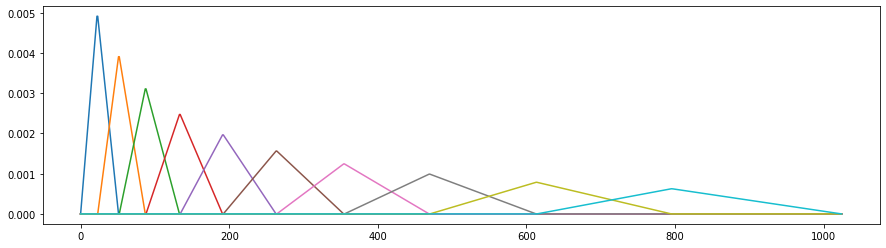

In [64]:
plt.figure(figsize=(15,4))
for n in range(filters.shape[0]):
    plt.plot(filters[n])

In [65]:
#Filter the signal
audio_filtered = np.dot(filters, np.transpose(audio_power))
audio_log = 10.0 * np.log10(audio_filtered)
audio_log.shape

(10, 93)

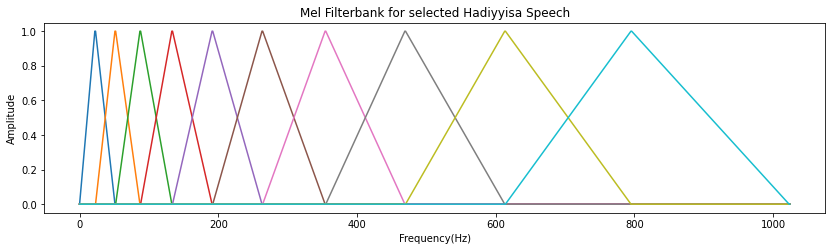

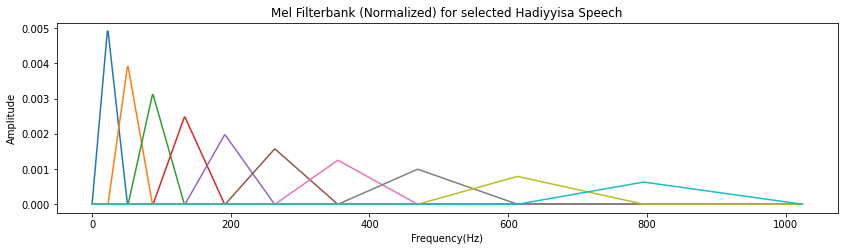

In [66]:
######################   Mel Filterbank and Mel Filterbank (Normalized) for selected Hadiyyisa Speech ###################
filters = get_filters(filter_points, FFT_size)

plt.figure(figsize=(14,3.5))
for n in range(filters.shape[0]):
    plt.plot(filters[n])
    plt.title('Mel Filterbank for selected Hadiyyisa Speech')
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency(Hz)')
# taken from the librosa library
enorm = 2.0 / (mel_freqs[2:mel_filter_num+2] - mel_freqs[:mel_filter_num])
filters *= enorm[:, np.newaxis]
plt.figure(figsize=(14,3.5))
for n in range(filters.shape[0]):
    plt.plot(filters[n])
    plt.title('Mel Filterbank (Normalized) for selected Hadiyyisa Speech')
    plt.ylabel('Amplitude')
    plt.xlabel('Frequency(Hz)')

In [67]:
# Generate the Cepstral Coefficents
def dct(dct_filter_num, filter_len):
    basis = np.empty((dct_filter_num,filter_len))
    basis[0, :] = 1.0 / np.sqrt(filter_len)
    
    samples = np.arange(1, 2 * filter_len, 2) * np.pi / (2.0 * filter_len)

    for i in range(1, dct_filter_num):
        basis[i, :] = np.cos(i * samples) * np.sqrt(2.0 / filter_len)
        
    return basis

In [68]:
dct_filter_num = 40

dct_filters = dct(dct_filter_num, mel_filter_num)

cepstral_coefficents = np.dot(dct_filters, audio_log)
cepstral_coefficents.shape

(40, 93)

In [69]:
# Reviewing Cepstral coefficents
cepstral_coefficents[:, 0]

array([ 1.69137955e+02,  1.70278057e+01,  4.12810084e+00, -6.86575332e-01,
       -3.19175321e+00,  6.80517396e-01,  1.08451701e+00,  2.28734756e+00,
       -4.76319890e-01, -7.09829804e-01, -2.05794409e-13,  7.09829804e-01,
        4.76319890e-01, -2.28734756e+00, -1.08451701e+00, -6.80517396e-01,
        3.19175321e+00,  6.86575332e-01, -4.12810084e+00, -1.70278057e+01,
       -2.39197190e+02, -1.70278057e+01, -4.12810084e+00,  6.86575332e-01,
        3.19175321e+00, -6.80517396e-01, -1.08451701e+00, -2.28734756e+00,
        4.76319890e-01,  7.09829804e-01,  1.61843859e-14, -7.09829804e-01,
       -4.76319890e-01,  2.28734756e+00,  1.08451701e+00,  6.80517396e-01,
       -3.19175321e+00, -6.86575332e-01,  4.12810084e+00,  1.70278057e+01])

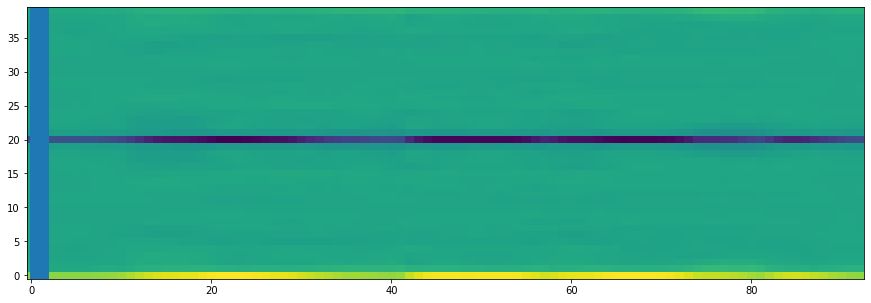

In [70]:
plt.figure(figsize=(15,5))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.imshow(cepstral_coefficents, aspect='auto', origin='lower');

(13, 80)


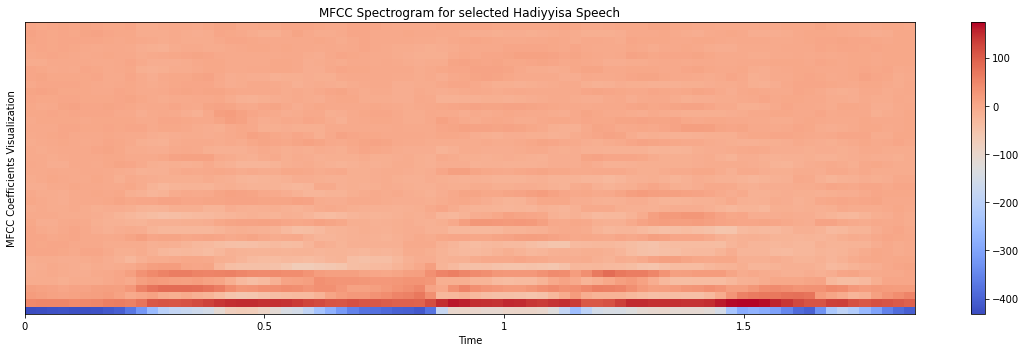

In [71]:
########################### MFCC Spectrogram and MFCC Coefficients ################################
mfccs = librosa.feature.mfcc(y=y, sr=sample_rate, n_mfcc=40)
print(mfcc.shape)
##############  Visualize the MFCC series

import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC Spectrogram for selected Hadiyyisa Speech')
plt.ylabel('MFCC Coefficients Visualization')
plt.tight_layout()

In [72]:
mfcc.shape

(13, 80)

In [73]:
mfcc

array([[-8.4587628e+02, -8.4219513e+02, -8.3801379e+02, ...,
        -7.6262329e+02, -7.9354633e+02, -8.1144611e+02],
       [ 4.8489059e+01,  4.9433952e+01,  5.0015137e+01, ...,
         1.1498385e+02,  1.0836655e+02,  1.0262396e+02],
       [ 1.3708210e+01,  9.9123077e+00,  6.3688025e+00, ...,
         2.1539856e+01,  3.4480743e+01,  4.4398201e+01],
       ...,
       [-4.0599971e+00, -8.9177456e+00, -1.1965112e+01, ...,
        -6.0971360e+00,  6.5622962e-01, -8.0678730e+00],
       [-4.9419322e+00, -1.0640851e+01, -9.0992069e+00, ...,
        -9.6358604e+00, -4.5582218e+00, -9.2670956e+00],
       [-6.6336212e+00, -5.9659271e+00, -6.1000032e+00, ...,
        -7.0225968e+00, -5.3154473e+00, -5.4433761e+00]], dtype=float32)

In [74]:
#######################  MFCC Data Values for selected Hadiyyisa Speech ############################
print("MFCC Data Values for selected Hadiyyisa Speech (Speaker1_30.wav):-\n")
print(mfcc)

MFCC Data Values for selected Hadiyyisa Speech (Speaker1_30.wav):-

[[-8.4587628e+02 -8.4219513e+02 -8.3801379e+02 ... -7.6262329e+02
  -7.9354633e+02 -8.1144611e+02]
 [ 4.8489059e+01  4.9433952e+01  5.0015137e+01 ...  1.1498385e+02
   1.0836655e+02  1.0262396e+02]
 [ 1.3708210e+01  9.9123077e+00  6.3688025e+00 ...  2.1539856e+01
   3.4480743e+01  4.4398201e+01]
 ...
 [-4.0599971e+00 -8.9177456e+00 -1.1965112e+01 ... -6.0971360e+00
   6.5622962e-01 -8.0678730e+00]
 [-4.9419322e+00 -1.0640851e+01 -9.0992069e+00 ... -9.6358604e+00
  -4.5582218e+00 -9.2670956e+00]
 [-6.6336212e+00 -5.9659271e+00 -6.1000032e+00 ... -7.0225968e+00
  -5.3154473e+00 -5.4433761e+00]]


In [75]:
####################### Feature Scaling #################################
## Let's scale the MFCCs such that each coefficient dimension has zero mean and unit variance:
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
print(mfcc.mean(axis=1))
print(mfcc.var(axis=1))

[ 1.0430813e-08  1.1920929e-08  5.2154063e-09 -7.4505806e-09
 -2.3841858e-08 -1.1920929e-08 -4.4703485e-09  5.9604646e-09
 -7.4505806e-09  5.2154063e-09  2.2351743e-09 -5.9604646e-09
 -1.4901161e-09]
[1.        1.        1.        1.0000001 0.9999999 1.        1.
 1.        1.        1.        1.        0.9999999 0.9999999]


In [76]:
cep_lifter = 22
(nframes, ncoeff) = mfcc.shape
n = np.arange(ncoeff)
lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n / cep_lifter)
mfcc *= lift

In [77]:
mfcc.shape

(13, 80)

In [78]:
print(mfcc)

[[ -1.6264322   -4.094881    -6.4017744  ...   9.417186    11.826534
   12.834088  ]
 [ -2.2405424   -5.6727357   -8.989815   ...   1.7517207    3.7644706
    5.3416667 ]
 [  0.52371705   1.0778972    1.3259743  ...  -7.3738074  -10.782263
  -13.003611  ]
 ...
 [  0.20075807  -0.39518565  -1.5437597  ...  -0.51970136  -5.3911586
    0.8787007 ]
 [  1.5998117    2.5992742    4.8035727  ... -11.166306   -16.209555
  -11.031444  ]
 [ -0.26234153  -0.5197087   -0.8795739  ...   2.971572     1.4274073
    1.4886498 ]]


In [79]:
############### Mean Normalization #########################
filter_banks -= (np.mean(filter_banks, axis=0) + 1e-8)

In [80]:
filter_banks

array([[-47.47109874, -49.04943676, -52.2431573 , ..., -41.39887279,
        -44.34603483, -45.94400409],
       [-51.10158611, -61.79608841, -53.69499407, ..., -43.946889  ,
        -45.74234657, -46.41524949],
       [-50.40169734, -58.06272174, -53.37361021, ..., -43.90350501,
        -41.94403832, -49.27726834],
       ...,
       [-48.77213133, -51.5097143 , -45.1548497 , ..., -38.07670266,
        -40.77024633, -47.69192708],
       [-47.26449874, -48.90771574, -44.98203425, ..., -42.27562026,
        -46.91590559, -46.88069071],
       [-50.0276542 , -49.67905937, -45.81942634, ..., -42.97079685,
        -45.91569269, -48.50861364]])

In [81]:
mfcc -= (np.mean(mfcc, axis=0) + 1e-8)
print(mfcc)

[[ -1.8584256   -4.343874    -6.7015805  ...  13.264669    16.298887
   16.07358   ]
 [ -2.4725358   -5.9217286   -9.289621   ...   5.599204     8.236824
    8.581159  ]
 [  0.2917236    0.82890403   1.026168   ...  -3.5263243   -6.30991
   -9.764118  ]
 ...
 [ -0.03123537  -0.6441788   -1.8435661  ...   3.3277817   -0.9188056
    4.1181927 ]
 [  1.3678182    2.350281     4.5037665  ...  -7.3188224  -11.737202
   -7.7919517 ]
 [ -0.49433497  -0.76870185  -1.1793802  ...   6.819055     5.8997602
    4.728142  ]]


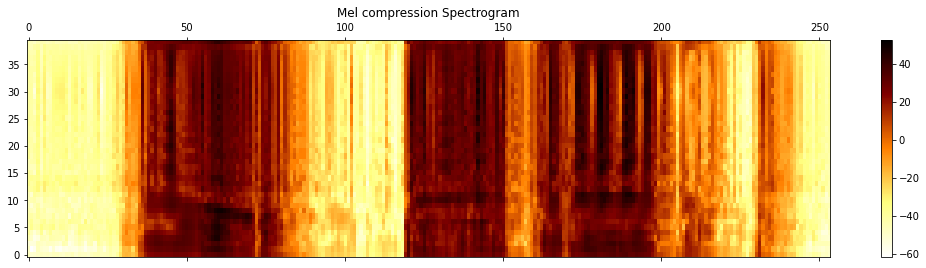

In [82]:
####################### Mel compression Spectrogram  ####################################
#After applying the filter bank to the power spectrum (peridogram) of the signal, we obtain the following spectrogram:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
cax = ax.matshow(
    np.transpose(filter_banks),
    interpolation="nearest",
    aspect="auto",
    cmap=plt.cm.afmhot_r,
    origin="lower",
)
fig.colorbar(cax)
plt.title("Mel compression Spectrogram")
plt.show()

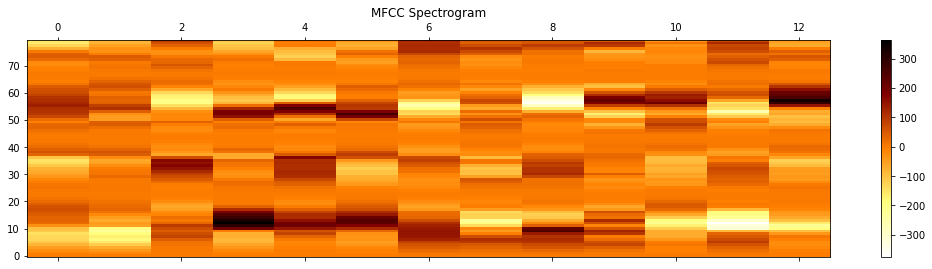

In [83]:
################3 MFCC Spectrogram ###################3
#One may apply sinusoidal liftering to the MFCCs to de-emphasize higher MFCCs 
#which has been claimed to improve speech recognition in noisy signals.

cep_lifter = 22
(nframes, ncoeff) = mfcc.shape
n = np.arange(ncoeff)
lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n/ cep_lifter)
mfcc *= lift

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
cax = ax.matshow(
    np.transpose(mfcc),
    interpolation="nearest",
    aspect="auto",
    cmap=plt.cm.afmhot_r,
    origin="lower",
)
fig.colorbar(cax)
plt.title("MFCC Spectrogram")
plt.show()

In [84]:
cep_lifter = 22
(nframes, ncoeff) = mfcc.shape
n = np.arange(ncoeff)
lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n / cep_lifter)
mfcc *= lift  #*

In [85]:
lift

array([  1.        ,   2.56546322,   4.09905813,   5.56956514,
         6.94704899,   8.20346807,   9.31324532,  10.25378886,
        11.00595195,  11.55442271,  11.88803586,  12.        ,
        11.88803586,  11.55442271,  11.00595195,  10.25378886,
         9.31324532,   8.20346807,   6.94704899,   5.56956514,
         4.09905813,   2.56546322,   1.        ,  -0.56546322,
        -2.09905813,  -3.56956514,  -4.94704899,  -6.20346807,
        -7.31324532,  -8.25378886,  -9.00595195,  -9.55442271,
        -9.88803586, -10.        ,  -9.88803586,  -9.55442271,
        -9.00595195,  -8.25378886,  -7.31324532,  -6.20346807,
        -4.94704899,  -3.56956514,  -2.09905813,  -0.56546322,
         1.        ,   2.56546322,   4.09905813,   5.56956514,
         6.94704899,   8.20346807,   9.31324532,  10.25378886,
        11.00595195,  11.55442271,  11.88803586,  12.        ,
        11.88803586,  11.55442271,  11.00595195,  10.25378886,
         9.31324532,   8.20346807,   6.94704899,   5.56

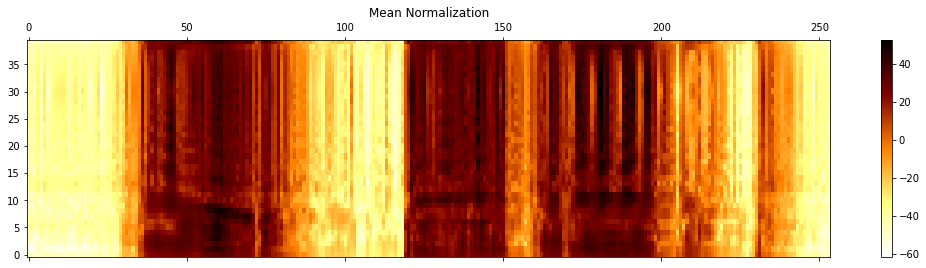

In [86]:
#############  Mean Normalization  ###########################
filter_banks -= (np.mean(filter_banks, axis=0) + 1e-8)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))

cax = ax.matshow(
    np.transpose(filter_banks),
    interpolation="nearest",
    aspect="auto",
    cmap=plt.cm.afmhot_r,
    origin="lower",
)
fig.colorbar(cax)
plt.title("Mean Normalization")
plt.show()

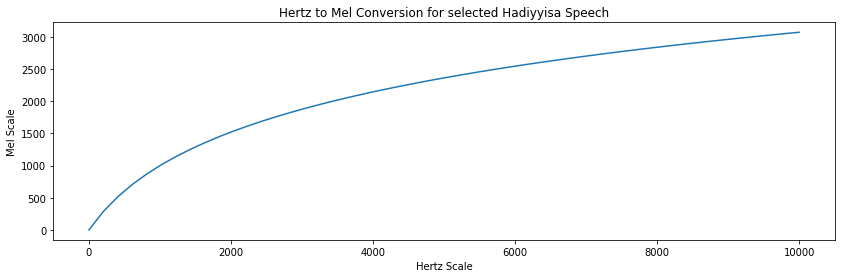

In [87]:
###############  Hertz to Mel Conversion ####################
import math
# Create function to convert Hz to Mels
def freqToMel(f):
    return 1127 * math.log(1 + (f/700))

# Vectorize function to apply to numpy arrays
freqToMelv = np.vectorize(freqToMel)

# Observing 0 to 10,000 Hz
Hz = np.linspace(0,1e4) 
# Now we just apply the vectorized function to the Hz variable
Mel = freqToMelv(Hz) 

# Plotting the figure:
fig, ax = plt.subplots(figsize = (14,4))
ax.plot(Hz, Mel)
plt.title('Hertz to Mel Conversion for selected Hadiyyisa Speech')
plt.xlabel('Hertz Scale')
plt.ylabel('Mel Scale')
plt.show()


MFCC   of number of windows and Length of the each features for Speaker1_30.wav:-
Number of windows = 99
Length of each feature = 13

Filter bank:-
Number of windows = 99
Length of each feature = 26


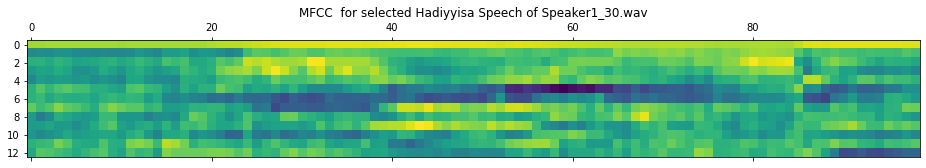

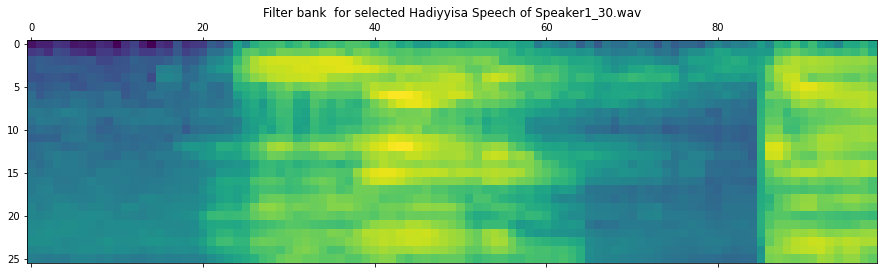

In [88]:
#########################  MFCC and Filter bank for selected Hadiyyisa Speech ############################
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
frequency_sampling, audio_signal = wavfile.read('C:/Users/Selamu/Hadiyyisa_RESEARCH/HadAudio_All/Speaker1_30.wav')
audio_signal = audio_signal[:16000]
features_mfcc = mfcc(audio_signal, frequency_sampling)
print('\nMFCC   of number of windows and Length of the each features for Speaker1_30.wav:-\nNumber of windows =', features_mfcc.shape[0])
print('Length of each feature =', features_mfcc.shape[1])
features_mfcc = features_mfcc.T
plt.matshow(features_mfcc)
plt.title('MFCC  for selected Hadiyyisa Speech of Speaker1_30.wav')
filterbank_features = logfbank(audio_signal, frequency_sampling)
print('\nFilter bank:-\nNumber of windows =', filterbank_features.shape[0])
print('Length of each feature =', filterbank_features.shape[1])
filterbank_features = filterbank_features.T
plt.matshow(filterbank_features)
plt.title('Filter bank  for selected Hadiyyisa Speech of Speaker1_30.wav')
plt.show()